In [5]:
#!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [7]:
# API to fetch the dataset from Kaggle
#!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
#dataset = 'kaggle datasets download -d andrewmvd/face-mask-detection'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3024.jpg', 'with_mask_2217.jpg', 'with_mask_3306.jpg', 'with_mask_1705.jpg', 'with_mask_1647.jpg']
['with_mask_94.jpg', 'with_mask_1980.jpg', 'with_mask_721.jpg', 'with_mask_2655.jpg', 'with_mask_3699.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_599.jpg', 'without_mask_188.jpg', 'without_mask_1408.jpg', 'without_mask_1501.jpg', 'without_mask_3590.jpg']
['without_mask_472.jpg', 'without_mask_434.jpg', 'without_mask_1052.jpg', 'without_mask_2058.jpg', 'without_mask_3271.jpg']


In [13]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [14]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

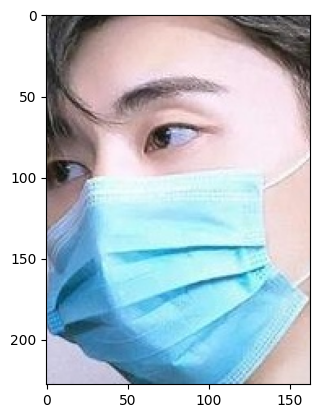

In [18]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

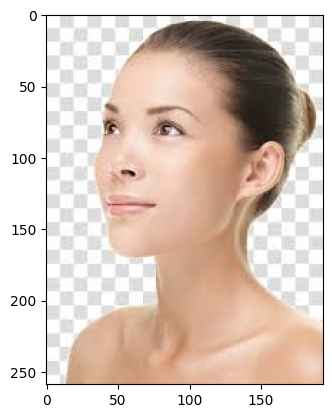

In [19]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [20]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

array([[[48, 57, 64],
        [47, 56, 63],
        [46, 55, 62],
        ...,
        [73, 76, 81],
        [72, 75, 80],
        [72, 75, 80]],

       [[48, 57, 64],
        [47, 56, 63],
        [46, 55, 62],
        ...,
        [73, 76, 81],
        [72, 75, 80],
        [72, 75, 80]],

       [[47, 56, 63],
        [46, 55, 62],
        [45, 54, 61],
        ...,
        [72, 75, 80],
        [72, 75, 80],
        [72, 75, 80]],

       ...,

       [[58, 74, 89],
        [58, 74, 89],
        [58, 74, 89],
        ...,
        [74, 83, 92],
        [74, 83, 92],
        [74, 83, 92]],

       [[59, 75, 90],
        [59, 75, 90],
        [59, 75, 90],
        ...,
        [72, 81, 90],
        [73, 82, 91],
        [74, 83, 92]],

       [[59, 75, 90],
        [59, 75, 90],
        [59, 75, 90],
        ...,
        [72, 81, 90],
        [72, 81, 90],
        [72, 81, 90]]], dtype=uint8)
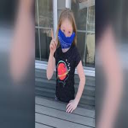

In [23]:
data[0]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[250, 252, 251],
        [250, 252, 251],
        [250, 252, 251],
        ...,
        [204, 225, 232],
        [202, 225, 231],
        [204, 224, 231]],

       [[250, 252, 251],
        [250, 252, 251],
        [250, 252, 251],
        ...,
        [211, 230, 237],
        [211, 230, 237],
        [211, 230, 237]],

       [[250, 252, 251],
        [250, 252, 251],
        [250, 252, 251],
        ...,
        [217, 234, 241],
        [217, 234, 241],
        [217, 234, 241]],

       ...,

       [[156, 176, 175],
        [156, 176, 175],
        [155, 175, 173],
        ...,
        [ 26,  58,  81],
        [ 26,  58,  81],
        [ 26,  58,  83]],

       [[165, 184, 183],
        [165, 184, 183],
        [165, 184, 181],
        ...,
        [ 26,  58,  81],
        [ 26,  58,  83],
        [ 26,  56,  82]],

       [[178, 191, 191],
        [178, 191, 191],
        [178, 192, 189],
        ...,
        [ 26,  58,  81],
        [ 26,  58,  83],
        [ 26,  56,  82]]], dtype=uint8)
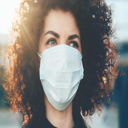

In [34]:
X_train[0]

In [35]:
X_train_scaled[0]

array([[[0.98039216, 0.98823529, 0.98431373],
        [0.98039216, 0.98823529, 0.98431373],
        [0.98039216, 0.98823529, 0.98431373],
        ...,
        [0.8       , 0.88235294, 0.90980392],
        [0.79215686, 0.88235294, 0.90588235],
        [0.8       , 0.87843137, 0.90588235]],

       [[0.98039216, 0.98823529, 0.98431373],
        [0.98039216, 0.98823529, 0.98431373],
        [0.98039216, 0.98823529, 0.98431373],
        ...,
        [0.82745098, 0.90196078, 0.92941176],
        [0.82745098, 0.90196078, 0.92941176],
        [0.82745098, 0.90196078, 0.92941176]],

       [[0.98039216, 0.98823529, 0.98431373],
        [0.98039216, 0.98823529, 0.98431373],
        [0.98039216, 0.98823529, 0.98431373],
        ...,
        [0.85098039, 0.91764706, 0.94509804],
        [0.85098039, 0.91764706, 0.94509804],
        [0.85098039, 0.91764706, 0.94509804]],

       ...,

       [[0.61176471, 0.69019608, 0.68627451],
        [0.61176471, 0.69019608, 0.68627451],
        [0.60784314, 0

**Building a Convolutional Neural Networks (CNN)**

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - acc: 0.6395 - loss: 0.8059 - val_acc: 0.8959 - val_loss: 0.2558
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8699 - loss: 0.3166 - val_acc: 0.8992 - val_loss: 0.2039
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9049 - loss: 0.2467 - val_acc: 0.9207 - val_loss: 0.1946
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9230 - loss: 0.1980 - val_acc: 0.9107 - val_loss: 0.2176
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9358 - loss: 0.1768 - val_acc: 0.9223 - val_loss: 0.1875


**Model Evaluation**

In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9194 - loss: 0.2398
Test Accuracy = 0.9199205636978149


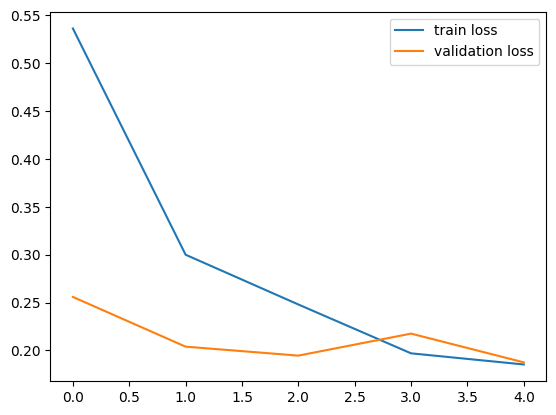

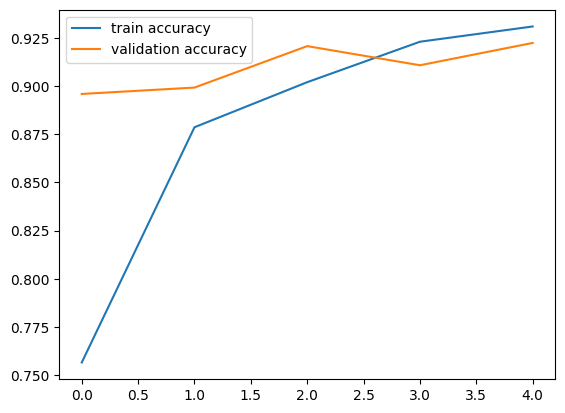

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


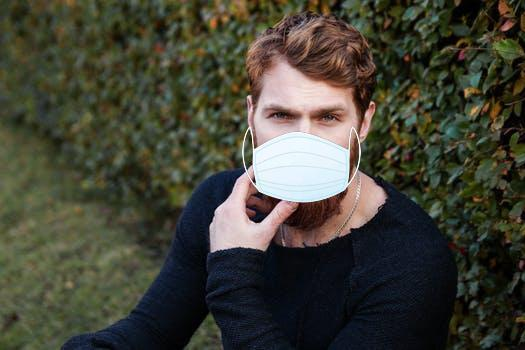

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
[[0.44194362 0.47142243]]
1
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


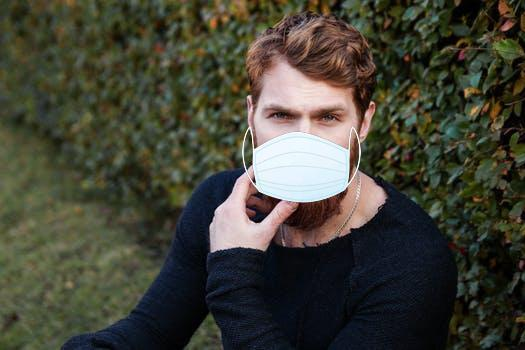

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.44194362 0.47142243]]
1
The person in the image is wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')